In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.svm import SVC

our optimization problem is $min_{\beta}   \ \lambda \| \beta \|_{2}^2 + \| y- X\beta \|_2^2 = min_{\beta} \ Z \ \  (say)$

let X is of order N x D

$Z = \lambda \| \beta \|_{2}^2 + \| y- X\beta \|_2^2 \\ \Rightarrow \lambda\beta^T \beta   + (y-X\beta)^T(y-X\beta)
\\ \Rightarrow y^T y - \beta ^T X^T y + \beta^T X ^T X \beta - y^T X \beta + \lambda \beta^T \beta$

To find the optimal weight vector $\boldsymbol{\beta}$, we take the derivative of the cost function with respect to $\boldsymbol{\beta}$ and set it to zero

$\Rightarrow 2X^T X \beta -2X^Ty +2\lambda \beta =0 \\ \Rightarrow X^TX\beta + \lambda \beta = X^Ty \ \  \ \ \ \  ....(1)$
 $ or X^TX\beta -X^Ty=-\lambda \beta  
\\ \Rightarrow \beta = \frac{1}{\lambda} X^T(y-X\beta) \\ so \  \beta \  can \  be  \ written \  as \\ \beta= X^T \alpha \ \ \ \   ...(2) \ where \ \ \alpha = \frac{1}{\lambda} (y-X\beta) \\ 
now \   we  \ can \  write \  (1) \  as \  
 \\ \beta=(X^T X + \lambda I_{D})^{-1} X^T y
 \\ \Rightarrow \beta = X^T(X X^T + \lambda I_{N})^{-1}y  \ \ \ ..(3) \  by \  matrix  \ inversion \  lemma \\
  \ comparing  \ (2)  \  and \  (3)  \ we \ got \ \\ \alpha = (X X^T + \lambda I_{N})^{-1}y \\ now  \ in \  this \  relation  \ X^TX  \ \text{can be effectively replace by a kernel matrix using the kernel function let k as kernel } \\ 
  \alpha = (K + \lambda I_N)^{-1}y
  \\ \text{then we can rewrite} \ \beta \ as \ 
  \\ \beta=X^T \alpha = \sum_{i=1}^{i=N} 
\alpha_i X_i \\   \text{This tells us that the solution vector is just a linear sum of the N training vectors. When we plug this in at test time to compute the predictive mean},\\ \text{let's compute for a sample} \  x̃  \\  \\  ỹ(x̃) = \beta^Tx̃ = \sum_{i=1}^{i=N} \alpha_i x_i^Tx̃ = \sum_{i=1}^{i=N} \alpha_i K(x̃,x_i)$



In [2]:
df=pd.read_csv("Data_Q2.csv")

In [3]:
df

Temperature  Humidity  Wind Speed     Flow  Consumption
0          5.578     93.00       0.082    0.185  5935.174070
1         15.510     64.38       0.085    0.133  6044.657863
2         15.730     64.21       0.084    0.152  6061.944778
3         15.620     65.22       0.083    0.145  6108.043217
4         15.450     67.69       0.083    0.189  6119.567827
..           ...       ...         ...      ...          ...
995       17.330     42.24       4.917   31.540  9443.855422
996        7.010     76.40       4.920   65.890  9449.638554
997       14.810     82.30       4.913    0.159  9449.638554
998       12.090     77.40       0.073    0.104  9449.638554
999       16.680     64.92       0.079  112.400  9449.990000

[1000 rows x 5 columns]

In [4]:
df2 = StandardScaler().fit_transform(df)
df2=pd.DataFrame(df2,columns=df.columns)

In [5]:
df2

Temperature  Humidity  Wind Speed      Flow  Consumption
0      -1.931878  1.404846   -0.641791 -0.664370    -3.450208
1       0.407654 -0.874474   -0.640417 -0.665724    -3.282442
2       0.459476 -0.888013   -0.640875 -0.665229    -3.255953
3       0.433565 -0.807575   -0.641333 -0.665412    -3.185315
4       0.393521 -0.610863   -0.641333 -0.664266    -3.167655
..           ...       ...         ...       ...          ...
995     0.836365 -2.637721    1.572655  0.152039     1.926266
996    -1.594563  0.082809    1.574029  1.046430     1.935127
997     0.242766  0.552690    1.570823 -0.665047     1.935127
998    -0.397944  0.162450   -0.645913 -0.666479     1.935127
999     0.683254 -0.831468   -0.643165  2.257439     1.935666

[1000 rows x 5 columns]

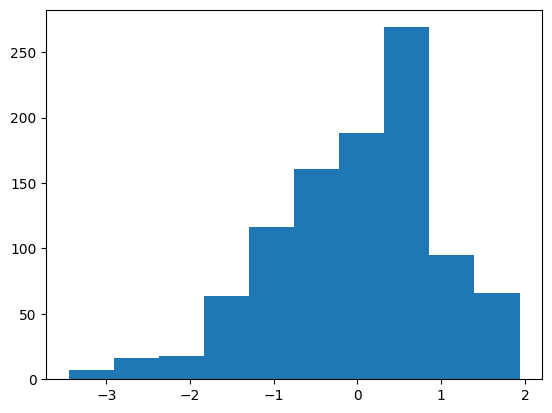

In [6]:
import matplotlib.pyplot as plt
plt.hist(df2['Consumption'])
plt.show()

from above histogram it's clear that data is imbalanced so we have to take care of it i have used smote for regression for taking care of above scenerio
Synthetic Minority Over-sampling Technique for Regression. SMOTER works in a similar way to SMOTE, but instead of generating synthetic examples by interpolating between pairs of similar samples, it generates new samples by perturbing the existing minority class samples. The perturbation process involves adding random noise to the feature values of the minority class samples, while ensuring that the perturbed samples still lie within the range of the original feature values. This helps to create new minority class samples that are similar to the existing ones, but not identical, and thus helps to improve the diversity of the minority class samples

In [7]:
T1=df2.sample(frac=0.8,random_state=18)
T2=df2.drop(T1.index)

In [8]:
!pip install smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
T1

Temperature  Humidity  Wind Speed      Flow  Consumption
246     0.230988  0.934966    1.571739 -0.656064    -0.687126
751    -1.147009  0.074845   -0.640417  0.284049     0.717448
75      0.544276 -0.363180   -0.646371 -0.665620    -1.578295
395    -0.918520 -1.092690   -0.641791 -0.102609    -0.174360
966     0.167388 -2.823284    1.574029  0.284310     1.713585
..           ...       ...         ...       ...          ...
988     0.786898  1.134068    1.576319 -0.666011     1.816774
770     0.610232 -1.733798   -0.641333  4.819539     0.752767
13     -0.506299  0.592510   -0.641791 -0.665125    -2.620209
631     0.162677 -1.085522    1.575861  0.210103     0.455224
573     1.321608 -1.330019   -0.631257  0.039817     0.332319

[800 rows x 5 columns]

In [10]:
T1.isna().sum()

Temperature    0
Humidity       0
Wind Speed     0
Flow           0
Consumption    0
dtype: int64

In [11]:
import smogn

In [12]:
def attempts():
    while True:
        try:
            global T1_smogn
            T1_smogn = smogn.smoter(data=T1,y='Consumption',samp_method = 'extreme',rel_thres = 0.80)
            break #breaks the loop when sucessful
        except ValueError:
            attempts() #recalls this function, starting back at the try statement
            break
attempts()

synth_matrix:   0%|          | 0/28 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/smogn/over_sampling.py:268: RuntimeWarning: invalid value encountered in double_scalars
  a = abs(data.iloc[i, z] - synth_matrix[
/usr/local/lib/python3.9/dist-packages/smogn/over_sampling.py:270: RuntimeWarning: invalid value encountered in double_scalars
  b = abs(data.iloc[knn_matrix[
synth_matrix:  71%|#######1  | 20/28 [00:00<00:00, 23.08it/s]/usr/local/lib/python3.9/dist-packages/smogn/over_sampling.py:268: RuntimeWarning: invalid value encountered in double_scalars
  a = abs(data.iloc[i, z] - synth_matrix[
/usr/local/lib/python3.9/dist-packages/smogn/over_sampling.py:270: RuntimeWarning: invalid value encountered in double_scalars
  b = abs(data.iloc[knn_matrix[
r_index:   0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/smogn/over_sampling.py:364: RuntimeWarning: invalid value encountered in double_scalars
  a = abs(data.iloc[i, z] - synth_matrix[
/usr/local/lib/

(array([  6.,  12.,  15.,  52.,  99., 129., 581., 446.,  86., 118.]),
 array([-3.45020803, -2.91162064, -2.37303325, -1.83444585, -1.29585846,
        -0.75727107, -0.21868367,  0.31990372,  0.85849111,  1.39707851,
         1.9356659 ]),
 <BarContainer object of 10 artists>)

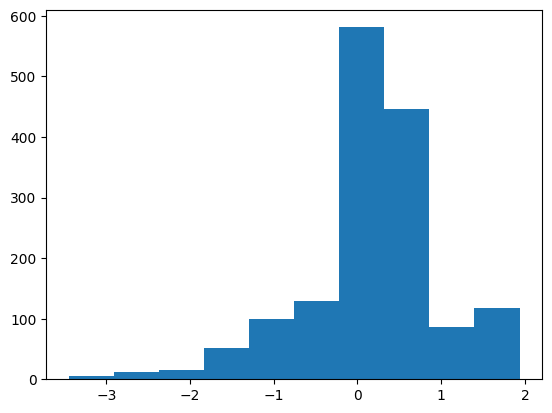

In [13]:
plt.hist(T1_smogn['Consumption'])

In [14]:
T1_smogn

Temperature  Humidity  Wind Speed      Flow  Consumption
246     0.230988  0.934966    1.571739 -0.656064    -0.687126
751    -1.147009  0.074845   -0.640417  0.284049     0.717448
75      0.544276 -0.363180   -0.646371 -0.665620    -1.578295
395    -0.918520 -1.092690   -0.641791 -0.102609    -0.174360
966     0.167388 -2.823284    1.574029  0.284310     1.713585
..           ...       ...         ...       ...          ...
739     0.262331  0.894716    1.546937  0.000000     0.000000
740     0.535794  0.000000    0.000000  0.000000     0.000000
741     0.000000  0.000000    1.574945  0.000000     0.992752
742     0.000000  0.000000    1.578034  0.079350     0.690080
743     0.961351  0.000000    0.000000  0.148196     0.000000

[1544 rows x 5 columns]

The gamma parameter in Kernel Ridge Regression (KRR) controls the width of the kernel function and has a significant impact on the performance of the model. The appropriate range for gamma values in KRR depends on the specific dataset.

In general, the gamma parameter should be chosen such that the resulting kernel function is neither too narrow nor too wide. A very small gamma value leads to a very narrow kernel, which may result in overfitting, while a very large gamma value results in a very wide kernel and may result in underfitting

i have choosen gamma value as 30 points between 0.1 to 100

In [15]:
pipeline = make_pipeline(KernelRidge(kernel='rbf'))
param_range = np.linspace(0.1,100,30)
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=T1_smogn.iloc[:,:-1], y=T1_smogn.iloc[:,-1],
                                             cv=5,n_jobs=-1,
                                              param_name='kernelridge__gamma', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')


train scores: [[0.28339344 0.31002258 0.24482744 0.20431557 0.2813184 ]
 [0.61410671 0.61699159 0.57560924 0.50183239 0.56917917]
 [0.67676373 0.67186813 0.64802133 0.57894656 0.64060958]
 [0.70889882 0.70132078 0.6818819  0.61953478 0.67612096]
 [0.72768763 0.72022771 0.70209966 0.64370515 0.69702138]
 [0.7399013  0.73310868 0.71562496 0.6596409  0.71076045]
 [0.74853582 0.7423972  0.7253645  0.67102736 0.72056333]
 [0.75503639 0.74944255 0.73275655 0.67968315 0.72800267]
 [0.76015377 0.75501507 0.73860274 0.68658424 0.73391905]
 [0.7643108  0.75957486 0.74338644 0.6922939  0.73879789]
 [0.76776625 0.76340874 0.7474131  0.69715623 0.74293684]
 [0.77069032 0.76670229 0.75088187 0.70139107 0.74652698]
 [0.77320121 0.76957973 0.75392602 0.70514418 0.7496956 ]
 [0.77538428 0.77212695 0.75663697 0.70851547 0.75253038]
 [0.77730286 0.7744053  0.75907905 0.7115756  0.75509353]
 [0.77900487 0.77645993 0.76129871 0.71437604 0.75743047]
 [0.78052716 0.77832507 0.76333043 0.71695531 0.7595753 ]


In [16]:
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.26477548 0.57554382 0.64324187 0.67755145 0.69814831 0.71180726
 0.72157764 0.72898426 0.73485497 0.73967278 0.74373623 0.74723851
 0.75030935 0.75303881 0.75549127 0.757714   0.75974266 0.76160471
 0.76332186 0.76491153 0.76638803 0.76776323 0.76904721 0.77024854
 0.77137467 0.77243208 0.7734265  0.77436298 0.77524604 0.77607973]
average val scores : [-0.23043941  0.12309829  0.12749138  0.10633267  0.08480247  0.06649822
  0.05140723  0.03890501  0.02841911  0.01952716  0.01192693  0.00539603
 -0.0002364  -0.00510681 -0.00932733 -0.01299179 -0.01617957 -0.01895824
 -0.02138546 -0.02351057 -0.02537581 -0.02701735 -0.0284662  -0.02974894
 -0.03088839 -0.03190417 -0.03281312 -0.03362977 -0.03436662 -0.03503448]


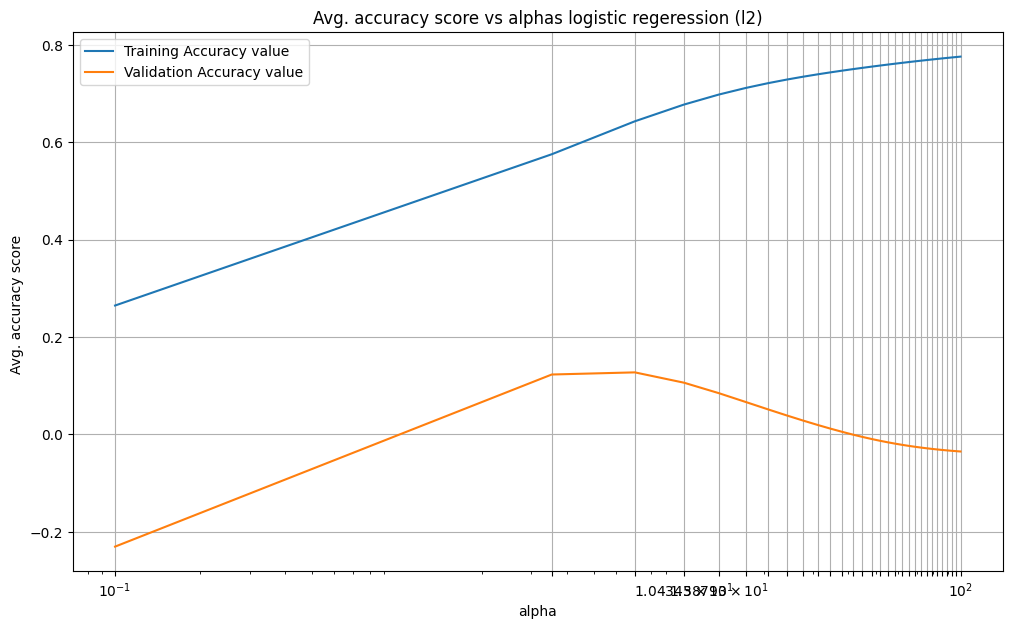

In [17]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy score vs alphas logistic regeression (l2)")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks(param_range)
plt.show()

In [18]:
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best_hyper_parameter from 5 fold CV:',best_alpha)

best_hyper_parameter from 5 fold CV: 6.989655172413793


In [19]:
kernelri = KernelRidge(kernel='rbf',gamma=best_alpha)

kernelri.fit(T1_smogn.iloc[:,:-1], T1_smogn.iloc[:,-1])
y_pred_train =kernelri.predict(T1_smogn.iloc[:,:-1])
y_pred_test=kernelri.predict(T2.iloc[:,:-1])


In [20]:
print("mean square error for training data t1 is", mean_squared_error(T1_smogn.iloc[:,-1], y_pred_train))
print("root mean square error for training data t1 is ", sqrt(mean_squared_error(T1_smogn.iloc[:,-1], y_pred_train)))
print("R^2 for training data set(T1) is ",r2_score(T1_smogn.iloc[:,-1], y_pred_train))

mean square error for training data t1 is 0.25175803072387287
root mean square error for training data t1 is  0.5017549508713122
R^2 for training data set(T1) is  0.6370587764446289


In [21]:
print("mean square error for test data t2 is", mean_squared_error(T2.iloc[:,-1], y_pred_test))
print("root mean square error for test data t2 is ", sqrt(mean_squared_error(T2.iloc[:,-1], y_pred_test)))
print('R^2 for test dataset(T2) is',r2_score(T2.iloc[:,-1],y_pred_test))

mean square error for test data t2 is 0.8013592190168243
root mean square error for test data t2 is  0.8951866950624457
R^2 for test dataset(T2) is 0.2163856792151393


(array([  7.,  16.,  18.,  64., 116., 161., 188., 269.,  95.,  66.]),
 array([-3.45020803, -2.91162064, -2.37303325, -1.83444585, -1.29585846,
        -0.75727107, -0.21868367,  0.31990372,  0.85849111,  1.39707851,
         1.9356659 ]),
 <BarContainer object of 10 artists>)

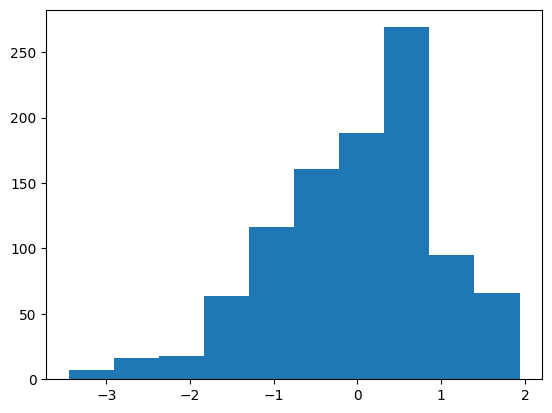

In [22]:
plt.hist(df2['Consumption'])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1],df2.iloc[:,-1], test_size=0.2,random_state=34)

(array([  5.,  14.,  15.,  53.,  96., 126., 144., 219.,  72.,  56.]),
 array([-3.45020803, -2.91162064, -2.37303325, -1.83444585, -1.29585846,
        -0.75727107, -0.21868367,  0.31990372,  0.85849111,  1.39707851,
         1.9356659 ]),
 <BarContainer object of 10 artists>)

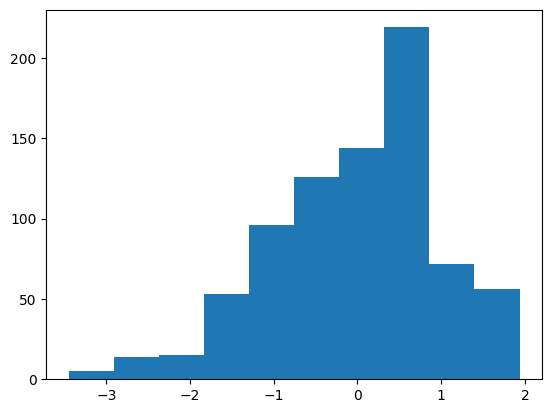

In [24]:
plt.hist(y_train)

(array([ 3.,  2.,  6., 13., 20., 41., 41., 45., 19., 10.]),
 array([-3.16765511, -2.65826303, -2.14887095, -1.63947887, -1.1300868 ,
        -0.62069472, -0.11130264,  0.39808944,  0.90748152,  1.41687359,
         1.92626567]),
 <BarContainer object of 10 artists>)

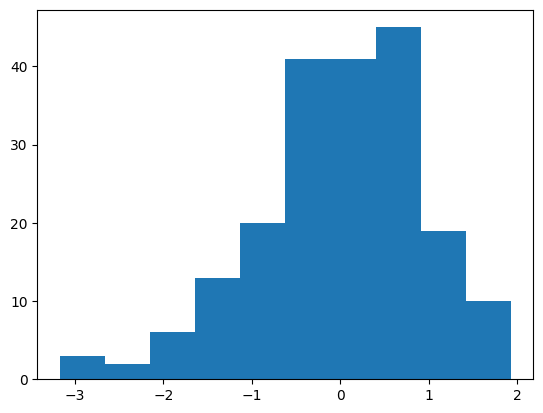

In [25]:
plt.hist(y_test)

clearly it is imbalance more sample lies in middle so it's skewed 

In [26]:
pipeline = make_pipeline(KernelRidge(kernel='rbf'))
param_range = np.linspace(0.1,100,30)
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=5,n_jobs=-1,
                                              param_name='kernelridge__gamma', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')


train scores: [[0.16351167 0.15691774 0.14551214 0.157705   0.16442207]
 [0.45004365 0.43745825 0.43704865 0.44560656 0.46175148]
 [0.54118221 0.54104192 0.53044964 0.53789384 0.54718066]
 [0.58732158 0.58846938 0.57812204 0.58382427 0.59290663]
 [0.61573852 0.61590392 0.60696643 0.61103012 0.62076021]
 [0.63471125 0.63381323 0.62637915 0.62940957 0.63906167]
 [0.64815005 0.64640146 0.6403906  0.64283532 0.65179244]
 [0.65820742 0.65583185 0.6511133  0.65320035 0.66116814]
 [0.66610136 0.66328397 0.65972481 0.66153626 0.66844131]
 [0.67254578 0.66942693 0.66690433 0.66844622 0.67433173]
 [0.67797612 0.67465653 0.67305827 0.67430533 0.67926495]
 [0.6826678  0.67921626 0.67844012 0.67936055 0.68350174]
 [0.68680062 0.68326136 0.68321538 0.68378273 0.68720873]
 [0.69049542 0.68689441 0.68749725 0.68769514 0.69049717]
 [0.69383588 0.69018592 0.69136688 0.69118963 0.69344482]
 [0.69688171 0.6931865  0.69488508 0.6943365  0.69610837]
 [0.69967693 0.6959342  0.69809912 0.69719058 0.69853076]


In [27]:
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.15761372 0.44638172 0.53954965 0.58612878 0.61407984 0.63267498
 0.64591397 0.65590421 0.66381754 0.670331   0.67585224 0.6806373
 0.68485376 0.68861588 0.69200463 0.69507963 0.69788632 0.70046039
 0.70283065 0.70502084 0.70705087 0.70893766 0.71069578 0.71233783
 0.71387485 0.71531651 0.71667133 0.7179469  0.71914991 0.72028638]
average val scores : [0.11491208 0.17124937 0.20139306 0.2129579  0.21678091 0.21704201
 0.21532694 0.21256382 0.20929551 0.20582964 0.20233873 0.19891844
 0.19562    0.19246849 0.18947345 0.18663523 0.18394893 0.18140679
 0.17899973 0.17671828 0.1745531  0.17249532 0.17053668 0.16866957
 0.16688707 0.16518289 0.16355134 0.16198723 0.16048589 0.15904303]


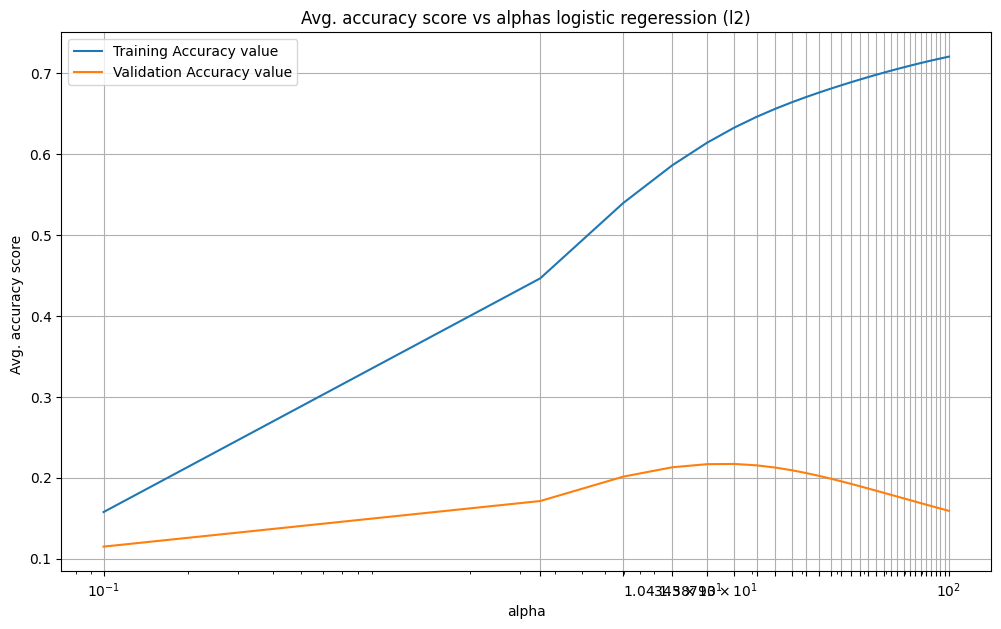

In [28]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy score vs alphas logistic regeression (l2)")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks(param_range)
plt.show()

In [29]:
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best_hyper_parameter from 5 fold CV:',best_alpha)

best_hyper_parameter from 5 fold CV: 17.324137931034485


In [30]:
kernelri = KernelRidge(kernel='rbf',gamma=best_alpha)

kernelri.fit(X_train,y_train)
y_pred_train =kernelri.predict(X_train)
y_pred_test=kernelri.predict(X_test)


In [31]:
print("mean square error for training data t1 is", mean_squared_error(y_train, y_pred_train))
print("root mean square error for training data t1 is ", sqrt(mean_squared_error(y_train, y_pred_train)))
print("R^2 for training data set(T1) is ",r2_score(y_train, y_pred_train))

mean square error for training data t1 is 0.37815966571011594
root mean square error for training data t1 is  0.6149468803970924
R^2 for training data set(T1) is  0.6288689780631662


In [32]:
print("mean square error for test data t2 is", mean_squared_error(y_test, y_pred_test))
print("root mean square error for test data t2 is ", sqrt(mean_squared_error(y_test, y_pred_test)))
print('R^2 for test dataset(T2) is',r2_score(y_test,y_pred_test))

mean square error for test data t2 is 0.6535310658091024
root mean square error for test data t2 is  0.8084126828601234
R^2 for test dataset(T2) is 0.2926869708367714


In [33]:
frame2=pd.read_csv('Data_Q2.csv')

In [34]:
clas=[]
for i in range(frame2.shape[0]):
  if frame2.iloc[i,-1]<=6500:
    clas.append(1)
  elif 6500<frame2.iloc[i,-1]<=7000:
    clas.append(2)
  elif 7000<frame2.iloc[i,-1]<=7500:
    clas.append(3)
  elif 7500<frame2.iloc[i,-1]<=8000:
    clas.append(4)
  elif 8000<frame2.iloc[i,-1]<=8500:
    clas.append(5)
  elif 8500<frame2.iloc[i,-1]<=9000:
    clas.append(6)
  elif frame2.iloc[i,-1]>9000:
    clas.append(7)


In [35]:
frame2['Class']=clas

In [36]:
frame=frame2.iloc[:2,:]
for i in range(1,8):
  data2=frame2[frame2.iloc[:,-1]==i].iloc[:,:-1]
  data4=frame2[frame2.iloc[:,-1]==i].iloc[:,-1]
  data3 = StandardScaler().fit_transform(data2)
  data5=pd.DataFrame(data3,columns=data2.columns)
  data5['Class']=data4.to_numpy()
  frame=pd.concat([data5,frame])

In [37]:
frame2=frame.drop(index=[0,1]).reset_index()

In [38]:
frame2=frame2.drop(columns='index')

In [39]:
T3_X, T4_X, T3_y, T4_y = train_test_split(frame2.iloc[:,:-1],frame2.iloc[:,-1], test_size=0.2,stratify=frame2.iloc[:,-1], random_state=42)

In [40]:
for i in range(1,8):
  print(f"number of sample with label {i} in training set is ",sum(T3_y==i))

number of sample with label 1 in training set is  10
number of sample with label 2 in training set is  20
number of sample with label 3 in training set is  81
number of sample with label 4 in training set is  173
number of sample with label 5 in training set is  222
number of sample with label 6 in training set is  202
number of sample with label 7 in training set is  80


In [41]:
for i in range(1,8):
  print(f"number of sample with label {i} in test set is ",sum(T4_y==i))

number of sample with label 1 in test set is  3
number of sample with label 2 in test set is  5
number of sample with label 3 in test set is  20
number of sample with label 4 in test set is  43
number of sample with label 5 in test set is  56
number of sample with label 6 in test set is  51
number of sample with label 7 in test set is  20


here data set is imbalanced so i have done smote sampling for balancing the data set

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
T3_X, T3_y = sm.fit_resample(T3_X, T3_y)

In [43]:
for i in range(1,8):
  print(f"number of sample with label {i} in training set is ",sum(T3_y==i))

number of sample with label 1 in training set is  222
number of sample with label 2 in training set is  222
number of sample with label 3 in training set is  222
number of sample with label 4 in training set is  222
number of sample with label 5 in training set is  222
number of sample with label 6 in training set is  222
number of sample with label 7 in training set is  222


In [44]:
for i in range(1,8):
  print(f"number of sample with label {i} in test set is ",sum(T4_y==i))

number of sample with label 1 in test set is  3
number of sample with label 2 in test set is  5
number of sample with label 3 in test set is  20
number of sample with label 4 in test set is  43
number of sample with label 5 in test set is  56
number of sample with label 6 in test set is  51
number of sample with label 7 in test set is  20


The gamma parameter in the RBF kernel of an SVM controls the smoothness or complexity of the decision boundary. A small gamma value leads to a smoother decision boundary, while a larger gamma value leads to a more complex or wiggly decision boundary that can better fit the training data.

The range of gamma values for the RBF kernel in SVC determines how much flexibility is given to the model to fit the training data. A smaller range of gamma values (e.g., between 0.01 and 1) will lead to a smoother decision boundary and may be appropriate when the data is relatively simple and well-behaved, while a larger range of gamma values (e.g., between 1 and 10) will lead to a more complex decision boundary and may be appropriate when the data is more complex or noisy.

In [45]:
pipeline = make_pipeline(SVC(kernel='rbf'))
param_range = np.linspace(0.1,10,20)
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=T3_X.iloc[:,:-1], y=T3_y,
                                             cv=5,n_jobs=-1,
                                              param_name='svc__gamma', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')

train scores: [[0.37329043 0.36041834 0.35478681 0.35237329 0.37379421]
 [0.63958166 0.6460177  0.63475463 0.6468222  0.63745981]
 [0.7377313  0.72888174 0.71359614 0.72566372 0.72347267]
 [0.77312953 0.77554304 0.78037007 0.77152051 0.76688103]
 [0.80370072 0.80691874 0.80450523 0.8004827  0.79099678]
 [0.82461786 0.81898632 0.82542237 0.81898632 0.81028939]
 [0.84875302 0.84473049 0.84312148 0.82864039 0.83601286]
 [0.87127916 0.86645213 0.85599356 0.8463395  0.85048232]
 [0.8769107  0.88093323 0.86725664 0.85679807 0.86495177]
 [0.88576026 0.88978278 0.87449718 0.87208367 0.87459807]
 [0.8930008  0.90265487 0.88736927 0.88173773 0.88344051]
 [0.90345937 0.91311344 0.89621883 0.89139179 0.89228296]
 [0.90909091 0.9227675  0.90667739 0.90426388 0.89630225]
 [0.91794047 0.92839903 0.90989541 0.91230893 0.90192926]
 [0.92518101 0.93403057 0.91713596 0.92035398 0.90996785]
 [0.93322607 0.93724859 0.92115849 0.92679002 0.90996785]
 [0.93563958 0.94288013 0.92598552 0.93242156 0.91237942]


In [46]:
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.36293262 0.6409272  0.72586911 0.77348884 0.80132084 0.81966045
 0.84025165 0.85810934 0.86937008 0.87934439 0.88964064 0.89929328
 0.90782039 0.91409462 0.92133387 0.9256782  0.92986124 0.93404338
 0.93758242 0.94256932]
average val scores : [0.33076237 0.57208588 0.62036926 0.6570418  0.67250078 0.69051136
 0.69435951 0.70143554 0.7065823  0.70980189 0.71366041 0.72396017
 0.72718183 0.73104865 0.73491339 0.7355544  0.73877399 0.74585416
 0.750362   0.75164609]


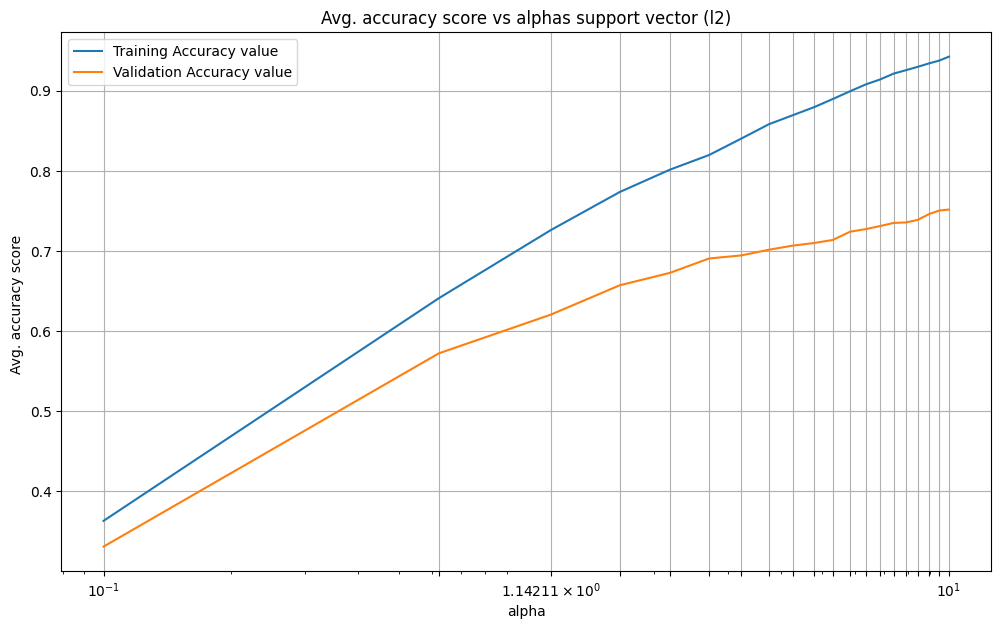

In [47]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy score vs alphas support vector (l2)")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks(param_range)
plt.show()

In [48]:
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best_hyper_parameter from 5 fold CV:',best_alpha)

best_hyper_parameter from 5 fold CV: 10.0


In [49]:
svc_kernel =SVC(kernel='rbf', gamma = best_alpha)

svc_kernel.fit(T3_X.iloc[:,:-1], T3_y)

y_pred_train =svc_kernel.predict(T3_X.iloc[:,:-1])
y_pred_test=svc_kernel.predict(T4_X.iloc[:,:-1])


In [50]:
train_score = svc_kernel.score(T3_X.iloc[:,:-1], T3_y)

test_score =svc_kernel.score(T4_X.iloc[:,:-1], T4_y)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)

Train accuracy: 0.9414414414414415
Test accuracy: 0.601010101010101



 
 
 for class 1
train scores: [[0.86294558 0.89155343 0.87297769 0.87504367 0.88046946]
 [0.92708473 0.94138104 0.93673521 0.93199345 0.93741759]
 [0.93933422 0.95063582 0.94816469 0.94365187 0.95092858]
 [0.94378603 0.95430434 0.95153357 0.94765973 0.95523602]
 [0.9459255  0.95597556 0.95245847 0.94925304 0.95686713]
 [0.94693176 0.95662578 0.95233522 0.94969774 0.95741649]
 [0.94730396 0.95667815 0.951734   0.94948886 0.95741501]
 [0.94735582 0.95640012 0.95095197 0.94893317 0.95711698]
 [0.94727037 0.9559595  0.95013437 0.94822198 0.95665687]
 [0.94713734 0.95545075 0.94933951 0.94745831 0.95610379]
 [0.94699168 0.9549213  0.94858287 0.94668826 0.95549282]
 [0.94684088 0.95439142 0.94786215 0.94592679 0.95484252]
 [0.94668053 0.95386695 0.94716931 0.94517428 0.95416345]
 [0.94650232 0.95334662 0.94649555 0.94442559 0.95346193]
 [0.94629775 0.95282631 0.94583308 0.94367452 0.95274184]
 [0.94605968 0.95230122 0.94517564 0.9429157  0.95200552]
 [0.94578294 0.95176709 0.94451851 0.942

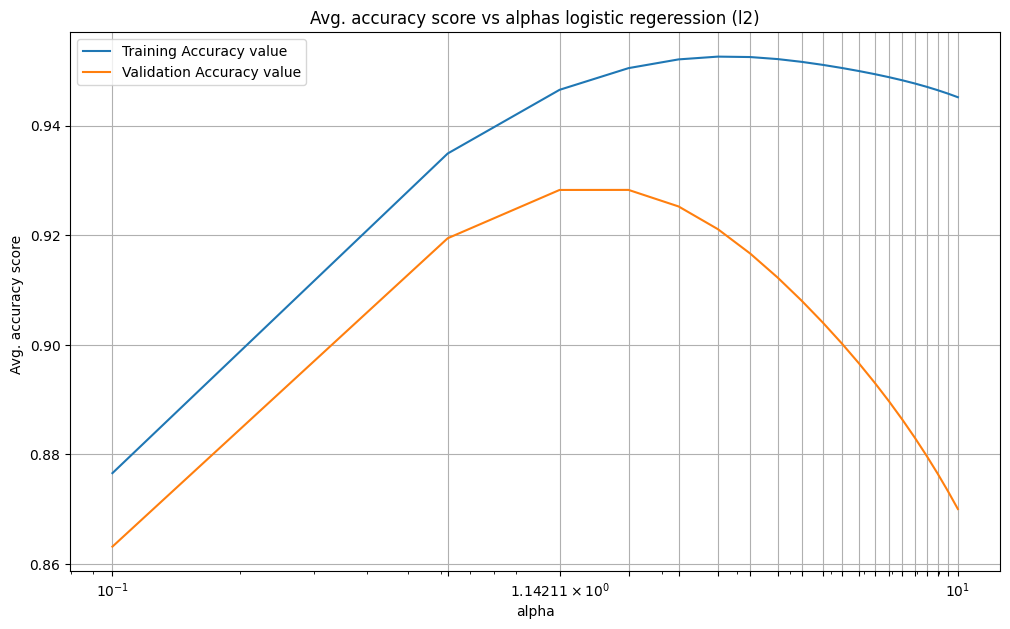

best_hyper_parameter from 5 fold CV: 1.6631578947368424

 
 
 for class 2
train scores: [[0.61043415 0.6087929  0.65951248 0.64524483 0.63431945]
 [0.84768282 0.84553681 0.8752067  0.86729262 0.85948271]
 [0.88314923 0.88088861 0.90370582 0.89797563 0.89249587]
 [0.90017169 0.89721502 0.91658166 0.91248274 0.90895222]
 [0.90914832 0.90568038 0.92308576 0.92000075 0.9179155 ]
 [0.91449839 0.91065709 0.92693686 0.92424168 0.92317325]
 [0.91791478 0.91375959 0.9293635  0.92672938 0.92637458]
 [0.92015087 0.91573979 0.93090739 0.92818695 0.92834424]
 [0.92164091 0.91703475 0.93190079 0.92902066 0.92956181]
 [0.92265818 0.91791342 0.93255292 0.92947351 0.93031847]
 [0.92337323 0.91853856 0.93298993 0.92969282 0.93078954]
 [0.92388978 0.91900534 0.93328592 0.92976767 0.93107875]
 [0.92426939 0.91936715 0.93348374 0.92975114 0.93124655]
 [0.92454781 0.91965255 0.93360776 0.92967412 0.93132786]
 [0.92474564 0.91987611 0.93367178 0.92955401 0.93134308]
 [0.92487499 0.92004507 0.93368376 0.92940

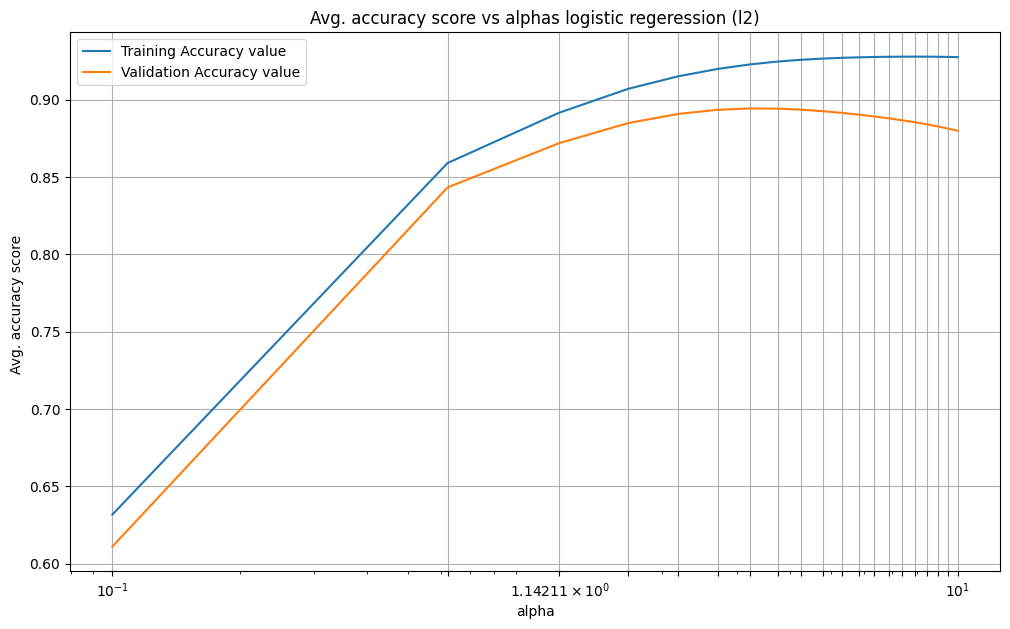

best_hyper_parameter from 5 fold CV: 3.2263157894736847

 
 
 for class 3
train scores: [[0.35193559 0.29964388 0.31515102 0.28904912 0.3242776 ]
 [0.57619101 0.51221064 0.54459442 0.51412396 0.53779545]
 [0.62422346 0.57111673 0.61068255 0.57819404 0.60119275]
 [0.65572615 0.60425248 0.64703646 0.61600589 0.64049887]
 [0.6777184  0.62704638 0.67063686 0.64153035 0.66726602]
 [0.6942092  0.64487077 0.68774437 0.66020343 0.68638218]
 [0.70752482 0.65982058 0.70105964 0.67476891 0.70061028]
 [0.71880565 0.67277783 0.71188252 0.68661288 0.71157549]
 [0.72861413 0.68418047 0.72093449 0.69651542 0.72028747]
 [0.73725305 0.69429225 0.72866014 0.70496856 0.72739889]
 [0.7449101  0.7032999  0.73535323 0.71230605 0.73334302]
 [0.75172034 0.71134991 0.74121844 0.71876358 0.73841341]
 [0.75779214 0.71856358 0.7464047  0.72451176 0.7428129 ]
 [0.76321761 0.72504405 0.75102438 0.72967652 0.7466844 ]
 [0.76807683 0.73088005 0.75516481 0.73435259 0.75013065]
 [0.77243976 0.73614847 0.75889541 0.73861

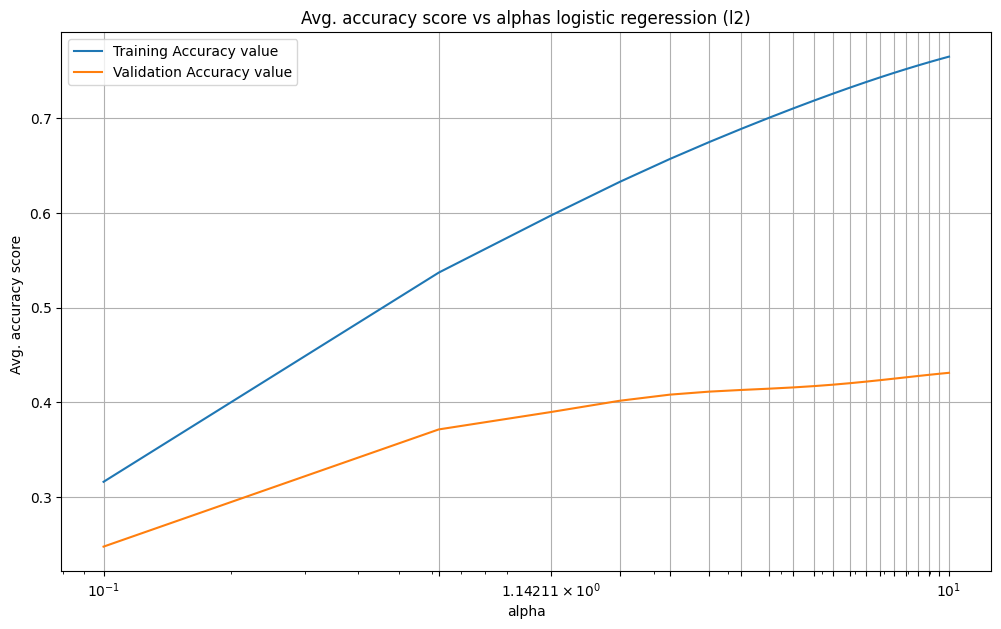

best_hyper_parameter from 5 fold CV: 10.0

 
 
 for class 4
train scores: [[0.23800967 0.22243005 0.26331423 0.22022002 0.16923079]
 [0.45357154 0.45807086 0.42478908 0.41819657 0.35350625]
 [0.53095401 0.5323779  0.49716997 0.50774569 0.44027901]
 [0.58382754 0.57790202 0.54899935 0.56942462 0.49959178]
 [0.62116635 0.61095584 0.58828091 0.61287471 0.54211301]
 [0.64705417 0.63577089 0.61731972 0.64357738 0.57279942]
 [0.66525057 0.65448187 0.63856499 0.66557296 0.59528545]
 [0.67843565 0.6687023  0.65429996 0.68168503 0.61217772]
 [0.68833009 0.67967303 0.66625611 0.69380744 0.62524553]
 [0.69601472 0.68830144 0.67562382 0.70318892 0.63565814]
 [0.70217398 0.69523026 0.68319097 0.71065037 0.64418397]
 [0.70724936 0.70090953 0.68947534 0.71673537 0.65133224]
 [0.71153183 0.70565462 0.69482005 0.72180877 0.65744607]
 [0.71521755 0.70968814 0.69945611 0.72611996 0.66276172]
 [0.71844176 0.71316899 0.70354215 0.72984277 0.66744579]
 [0.72129983 0.71621201 0.70718951 0.73310101 0.67161877

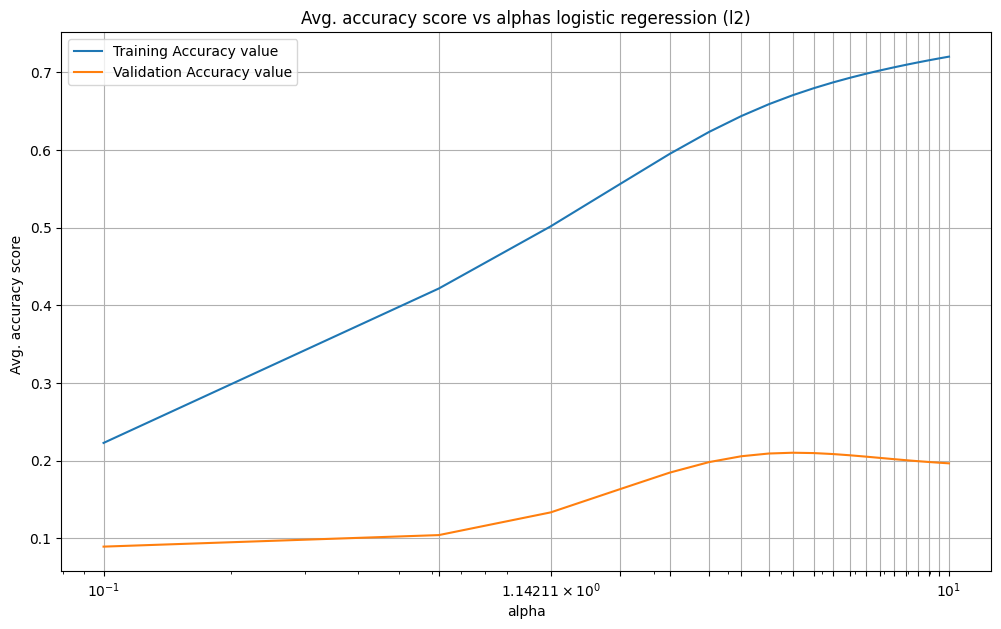

best_hyper_parameter from 5 fold CV: 4.268421052631579

 
 
 for class 5
train scores: [[0.11816413 0.17896309 0.12257165 0.12841647 0.14545128]
 [0.26453704 0.34052755 0.26727387 0.28610793 0.29540276]
 [0.36454019 0.41546124 0.34333961 0.37876092 0.39753542]
 [0.42788948 0.46195514 0.39114262 0.43621524 0.46005161]
 [0.47067787 0.49315213 0.42360599 0.47561176 0.49976348]
 [0.50105386 0.51550441 0.44755992 0.50411463 0.52718248]
 [0.52339611 0.53225222 0.46634607 0.52531858 0.54746628]
 [0.54038044 0.54524794 0.4816734  0.54147402 0.56323828]
 [0.55370786 0.55562826 0.49451174 0.55409158 0.57594181]
 [0.56447633 0.56412232 0.50547008 0.56419104 0.58643321]
 [0.5734045  0.57121671 0.51496015 0.57246236 0.59525592]
 [0.58097132 0.57724786 0.52327445 0.5793768  0.6027759 ]
 [0.58750327 0.5824555  0.53062815 0.58526122 0.60925252]
 [0.59322847 0.58701451 0.53718415 0.59034664 0.61487741]
 [0.59831044 0.59105485 0.54306882 0.59479973 0.6197969 ]
 [0.60286925 0.59467458 0.54838235 0.598743

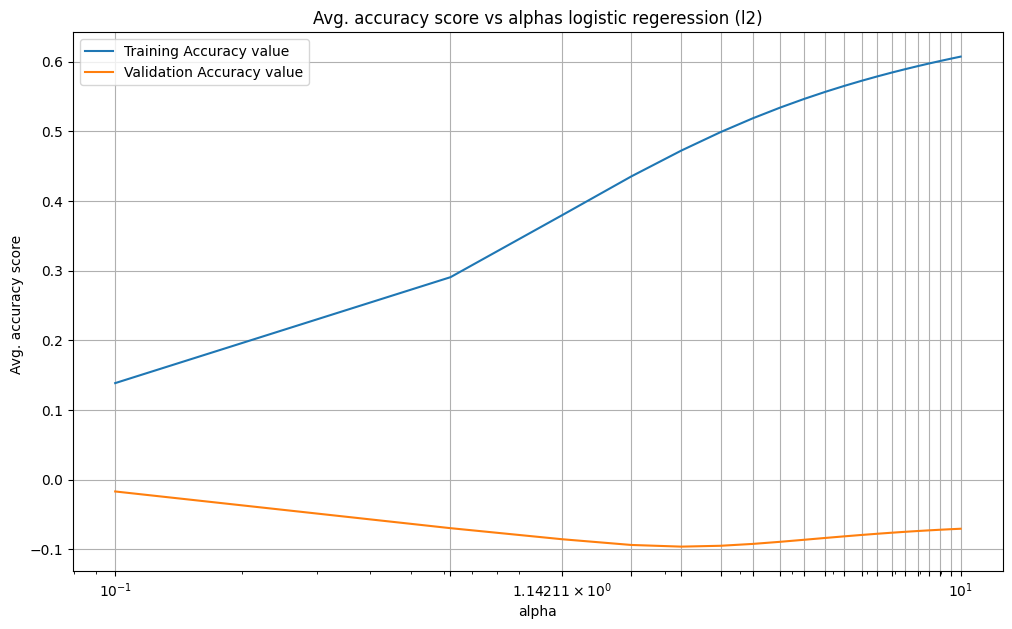

best_hyper_parameter from 5 fold CV: 0.1

 
 
 for class 6
train scores: [[0.12340208 0.11673833 0.12274586 0.11058131 0.10150599]
 [0.34466166 0.32530229 0.34869384 0.31840348 0.27703159]
 [0.45681516 0.41650977 0.4354783  0.40946519 0.36768575]
 [0.51887023 0.47021087 0.48573425 0.46053205 0.42067556]
 [0.55853084 0.50611746 0.51948029 0.49476877 0.45802931]
 [0.58622162 0.53251315 0.54459962 0.51959336 0.48707026]
 [0.60687284 0.55347901 0.56455734 0.53870119 0.51087664]
 [0.62302939 0.57092386 0.58106923 0.55418322 0.53093007]
 [0.63611876 0.58579373 0.59509633 0.56723344 0.5480906 ]
 [0.64700603 0.59862733 0.60722452 0.57853991 0.56293646]
 [0.65624754 0.60978275 0.61783453 0.58851139 0.5758871 ]
 [0.66421771 0.61952759 0.62719066 0.59740526 0.58725987]
 [0.67117822 0.62807586 0.63548922 0.60539691 0.59730269]
 [0.67731816 0.63560448 0.64288456 0.6126161  0.60621442]
 [0.68277835 0.64226174 0.64950288 0.61916538 0.61415793]
 [0.68766649 0.64817261 0.65544967 0.62512943 0.62126846]

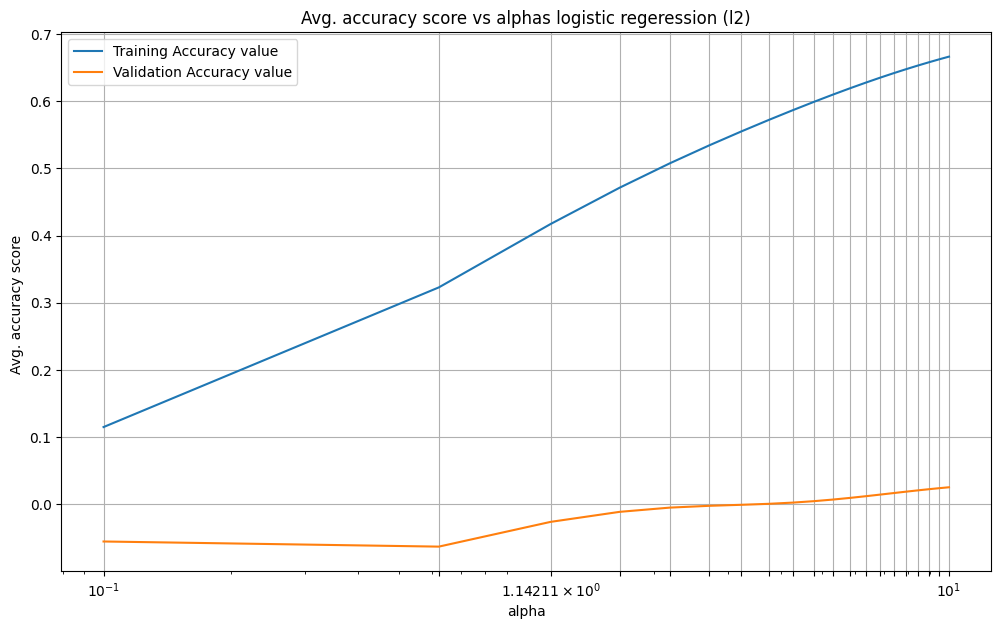

best_hyper_parameter from 5 fold CV: 10.0

 
 
 for class 7
train scores: [[0.25086    0.29702888 0.20301174 0.23914706 0.24281796]
 [0.53666768 0.56680736 0.45457905 0.4936883  0.48507424]
 [0.62931086 0.65616003 0.56218994 0.59299816 0.58460558]
 [0.67966028 0.70741592 0.6317235  0.65729777 0.64750741]
 [0.7127534  0.73985181 0.6774791  0.69945824 0.68912667]
 [0.73618477 0.7618361  0.7092622  0.72858839 0.71757217]
 [0.75341083 0.77742818 0.73234271 0.74953563 0.73767011]
 [0.76642284 0.78887337 0.74959133 0.76498238 0.7523812 ]
 [0.77648255 0.79751011 0.76274641 0.77660194 0.763521  ]
 [0.78442537 0.80418128 0.7729561  0.78550969 0.77221394]
 [0.79081693 0.80944027 0.7810125  0.79246523 0.77917263]
 [0.79604617 0.81366107 0.78747154 0.7979893  0.78486176]
 [0.80038486 0.81710186 0.79272704 0.80244156 0.7895935 ]
 [0.8040265  0.81994433 0.79706062 0.80607364 0.79358393]
 [0.80711184 0.82231872 0.80067616 0.80906486 0.796987  ]
 [0.80974566 0.82432024 0.80372334 0.81154593 0.79991543

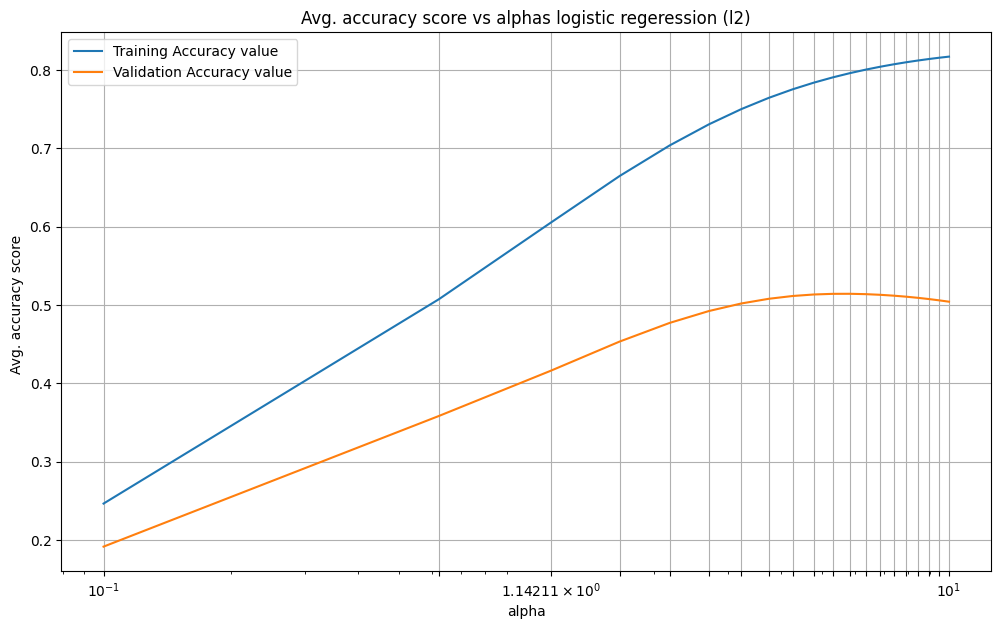

best_hyper_parameter from 5 fold CV: 5.831578947368421


In [51]:
x_train=[[] for i in range(7)]
y_train=[[] for i in range(7)]
x_test=[[] for i in range(7)]
y_test=[[] for i in range(7)]
kernelri={}
for i in range(7):
  x_train[i]=T3_X[T3_y==i+1].iloc[:,:-1]
  y_train[i]=T3_X[T3_y==i+1].iloc[:,-1]
  pipeline = make_pipeline(KernelRidge(kernel='rbf'))
  param_range = np.linspace(0.1,10,20)
  train_scores, val_scores = validation_curve(estimator=pipeline,
                                              X=x_train[i], y=y_train[i],
                                              cv=5,n_jobs=-1,
                                                param_name='kernelridge__gamma', param_range=param_range)
  print('\n \n \n for class',i+1)
  print('train scores:',train_scores)
  print('val scores:',val_scores)

  print('Printing more details of scores for each alpha:')
  for j in range(len(param_range)):
    print('alpha:', param_range[j])
    print('train scores:', train_scores[j])
    print('val scores:', val_scores[j])
    print('**************************')
  avg_train_scores = np.mean(train_scores,axis=1)
  avg_val_scores = np.mean(val_scores,axis=1)
  print('average train scores :',avg_train_scores)
  print('average val scores :',avg_val_scores)
  plt.figure(figsize =(12,7))
  plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
  plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
  plt.xlabel('alpha')
  plt.ylabel('Avg. accuracy score ')
  plt.title("Avg. accuracy score vs alphas logistic regeression (l2)")
  plt.xscale('log')
  plt.grid()
  plt.legend()
  plt.xticks(param_range)
  plt.show()
  best_alpha = param_range[np.argmax(avg_val_scores)]
  print('best_hyper_parameter from 5 fold CV:',best_alpha)
  kernelri[i+1] = KernelRidge(kernel='rbf',gamma=best_alpha)
  kernelri[i+1].fit(x_train[i], y_train[i])


In [52]:
y_pred_train=[]
y_train=[]
label=svc_kernel.predict(T3_X.iloc[:,:-1])
for i in range(1,8):
    y_pred_train.extend(list(kernelri[i].predict(T3_X[label==i].iloc[:,:-1])))
    y_train.extend(list(T3_X[label==i].iloc[:,-1]))

In [53]:
print("mean square error for training data t3 is", mean_squared_error(y_train, y_pred_train))
print("root mean square error for training data t3 is ", sqrt(mean_squared_error(y_train, y_pred_train)))
print("R^2 for training data set(T3) is ",r2_score(y_train, y_pred_train))

mean square error for training data t3 is 0.3241568813106837
root mean square error for training data t3 is  0.5693477683373175
R^2 for training data set(T3) is  0.6020735685555866


In [54]:
y_pred_test=[]
y_test=[]
label=svc_kernel.predict(T4_X.iloc[:,:-1])
for i in range(1,8):
    y_pred_test.extend(list(kernelri[i].predict(T4_X[label==i].iloc[:,:-1])))
    y_test.extend(list(T4_X[label==i].iloc[:,-1]))

In [55]:
print("mean square error for test data t4 is", mean_squared_error(y_test, y_pred_test))
print("root mean square error for test data t4 is ", sqrt(mean_squared_error(y_test, y_pred_test)))
print('R^2 for test dataset(T4) is',r2_score(y_test,y_pred_test))

mean square error for test data t4 is 1.1319256588487328
root mean square error for test data t4 is  1.0639199494551894
R^2 for test dataset(T4) is -0.06505800575837517


here for our example simple regression have less RMSE compare to Two stage approach so we can say that simple regression perform better

The two-stage approach of classification-followed-by-regression can be useful when there is a need to model a complex relationship between the response variable and the predictors. It can be used in situations where the relationship between the predictors and the response is not straightforward and may involve different patterns in different regions of the predictor space.

For instance, if we have a dataset with a mixture of linear and nonlinear relationships between the predictors and the response, a two-stage approach can be useful. In the first stage, a classifier can be trained to identify the subset of data points that exhibit a linear relationship, and in the second stage, a regression model can be fit to this subset to model the linear relationship. Similarly, a regression model can be fit to the subset of data points that exhibit a nonlinear relationship.

On the other hand, a simple regression approach on the full dataset can be useful when the relationship between the predictors and the response is linear, and there is no need to model the non-linear relationships. In this case, a two-stage approach would not be necessary and may introduce additional complexity and computational burden

